## ТМО РК №2
### Кузьмин Ярослав Артемович ИУ5-62Б

**Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте Метод опорных векторов и Случайный лес. Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.**

**Набор данных: https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent**

**Импорты:**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

**Загрузка датасета:**

In [2]:
original_data = pd.read_csv('houses_to_rent.csv', sep=",")

In [3]:
original_data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


**Обработка данных:**

In [4]:
original_data.dtypes

Unnamed: 0         int64
city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

In [5]:
original_data.shape

(6080, 14)

In [6]:
original_data.isnull().sum()

Unnamed: 0        0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [7]:
# Уберем все остальные стоимости, нас будет интересовать только общая
cols_drop = ['hoa', 'rent amount','property tax', 'fire insurance', 'Unnamed: 0']
data = original_data.drop(cols_drop, axis = 1)

In [8]:
# Обработаем целевой признак, преобразуем его в числовой формат
data['total'] = data['total'].replace({'R\$': '', ',': ''}, regex=True).astype(int)

In [9]:
# Избавимся от выбросов
data = data[data['total'] <= 20000]

In [10]:
data.dtypes

city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
total              int32
dtype: object

In [11]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

In [12]:
data.dtypes

city              int64
area              int64
rooms             int64
bathroom          int64
parking spaces    int64
floor             int32
animal            int32
furniture         int32
total             int32
dtype: object

<Axes: >

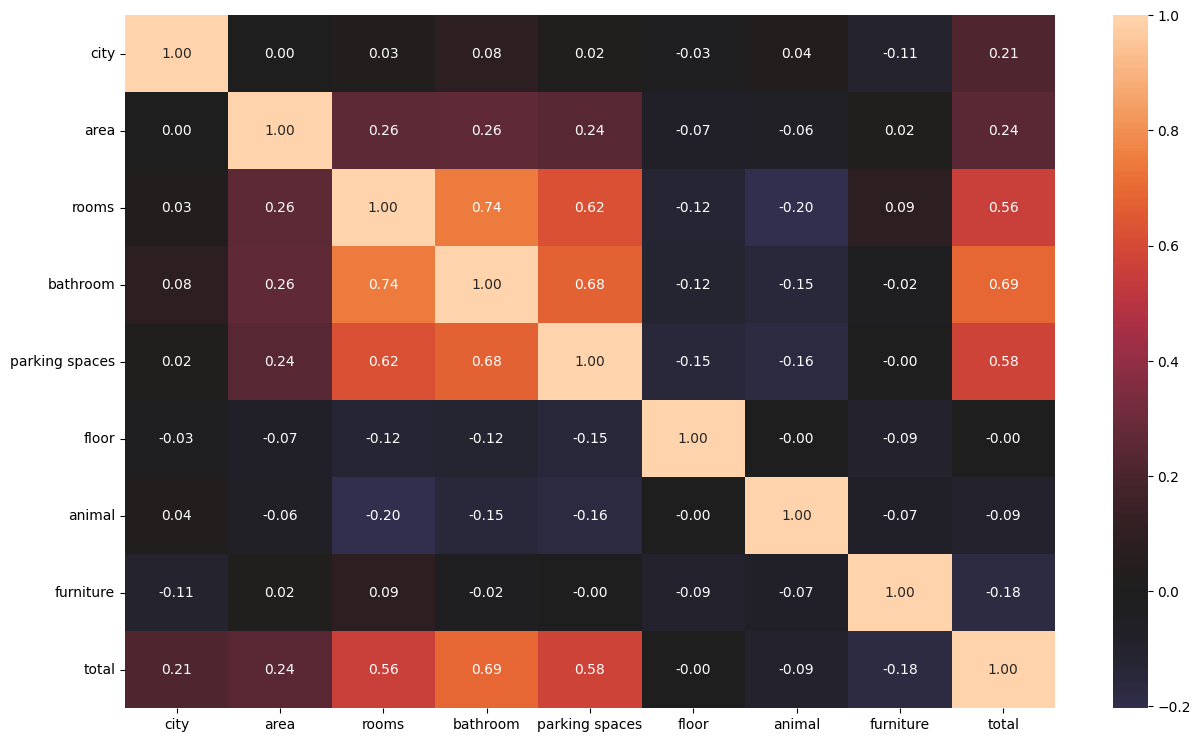

In [13]:
#Построение корреляционной матрицы
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f", center=0)

In [14]:
#Разделение выборки на обучающую и тестовую
target = "total"
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

In [15]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((4792, 8), (1198, 8), (4792,), (1198,))

**Метод опорных векторов:**

In [16]:
SVC = SVC(probability=True)
SVC.fit(trainX, trainY)

SVC(probability=True)

**Для оценки качества будем использовать:**

**-Коэффициент детерминации, чтобы узнать насколько модель близка к высококачественной**

**-Корень из средней квадратичной ошибки, чтобы выделить большие ошибки в предсказании модели**

In [17]:
R2_SVC = r2_score(testY, SVC.predict(testX))
RMSE_SVC = root_mean_squared_error(testY, SVC.predict(testX))

In [18]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_SVC))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_SVC))

Оценка качества модели с помощью коэффициента детерминации: 0.23941854500409498
Корень из средней квадратичной ошибки: 3762.6173760248253


С помощью используемых метрик, можем сделать вывод, что качество модели довольно низкое, так как целевой признак слабо коррелирует с другими параметрами

**Случайный лес:**

In [19]:
RF = RandomForestRegressor(n_estimators=10, random_state=1)
RF.fit(trainX, trainY)

RandomForestRegressor(n_estimators=10, random_state=1)

In [20]:
R2_RF = r2_score(testY, RF.predict(testX))
RMSE_RF = root_mean_squared_error(testY, RF.predict(testX))

In [21]:
print("Оценка качества модели с помощью коэффициента детерминации: {}".format(R2_RF))
print("Корень из средней квадратичной ошибки: {}".format(RMSE_RF))

Оценка качества модели с помощью коэффициента детерминации: 0.6244090773901114
Корень из средней квадратичной ошибки: 2644.0808732400806


В данном случае, можем увидеть, что ансамблевая модель случайного леса предсказывает значения с большей точностью в отличие от метода опорных векторов. Видим более низкий показатель RMSE и более высокий R2, этот результат можно считать достаточно логичным